## Test "best of two" classifier 

This notebook test a classifier that operates in two layers:
- First we use a SVM classifier to label utterances with high degree of certainty.
- Afterwards we use heuristics to complete the labeling

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import random
import pickle
import matplotlib.pyplot as plt

root_path = os.path.dirname(os.path.abspath(os.getcwd()))
sys.path.append(root_path)

from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from src import phase_classification as pc

data_path = os.path.join(root_path,'data')
tables_path = os.path.join(data_path,'tables')
results_path = os.path.join(root_path,'results')
output_path =os.path.join(results_path,'tables')

In [2]:
import importlib
importlib.reload(pc)

<module 'src.phase_classification' from 'C:\\Users\\CATALINA ESPINOZA\\Documents\\ciae\\Classification_IBL\\src\\phase_classification.py'>

In [3]:
WITH_STEMMING = True
#REMOVE_STOPWORDS = True
SEED = 10
NUM_TOPICS = 60
random.seed(SEED)

In [4]:
test_i = '[test1]'
file_name = test_i+'IBL_topic_distribution_by_utterance_minimum_5_words_with_stemming_{}_{}.xlsx'.format(WITH_STEMMING,NUM_TOPICS)
df_data = pd.read_excel(os.path.join(tables_path,'test',file_name))

In [5]:
the_keys = list(set(df_data['phase']))
total_samples = 0
class_samples = {}
for key in the_keys:
    n = list(df_data.phase.values).count(key)
    #print("key {}, total {}".format(key,n))
    total_samples += n
    class_samples[key] = n
print(total_samples)
for key in the_keys:
    print("key {}, samples: {}, prop: {}".format(key,class_samples[key],round(class_samples[key]*1.0/total_samples,2)))

181
key 1, samples: 55, prop: 0.3
key 2, samples: 27, prop: 0.15
key 3, samples: 46, prop: 0.25
key 4, samples: 7, prop: 0.04
key 5, samples: 46, prop: 0.25


In [6]:
filter_rows = list(range(60))+[67,68]
row_label = 60

In [7]:
df_data.head(2)

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,...,Topic 60,phase,phase_1,phase_2,phase_3,phase_4,phase_5,utterance,length utterance,utterance_relative_time
0,0.008418,0.011185,0.005599,0.005092,0.003249,0.004417,0.004143,0.007655,0.011196,0.013947,...,0.010312,5,0,0,0,0,1,paina suora,0.043478,0.000000
1,0.009546,0.012683,0.006349,0.005774,0.003684,0.005008,0.004698,0.008680,0.012694,0.015815,...,0.011693,5,0,0,0,0,1,no emmä tiiä olis ihan,0.173913,0.005181


In [8]:
dfs_all,_ = pc.split_df_discussions(df_data,.0,SEED)
X_all,y_all_1 = pc.get_joined_data_from_df(dfs_all,filter_rows,row_label)
len(y_all_1)

181

In [9]:
name_classifier = 'classifier_svm_linear_combination_svc.pickle'
with open(os.path.join(data_path,name_classifier),'rb') as f:
    svc = pickle.load(f)
    coeff = pickle.load(f)
    t = pickle.load(f)
output_first_layer_1 = pc.first_layer_classifier(X_all,t,svc)
comparison = list(zip(output_first_layer_1,y_all_1))
t

0.55

In [10]:
df_data['first_layer'] = output_first_layer_1

In [11]:
second_layer_1 = pc.second_layer_combination_test(X_all,coeff,svc)

(array([121.,   0.,   0.,  21.,   0.,   0.,  15.,   0.,   1.,  23.]),
 array([-1. , -0.4,  0.2,  0.8,  1.4,  2. ,  2.6,  3.2,  3.8,  4.4,  5. ]),
 <a list of 10 Patch objects>)

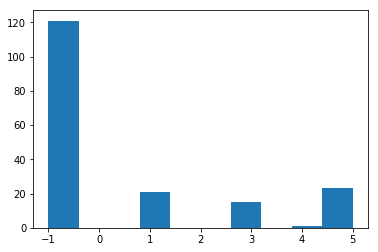

In [12]:
plt.hist(output_first_layer_1)

In [14]:
df_data['second_layer'] = second_layer_1
df_data.to_excel(os.path.join(output_path,'[second_layer]'+file_name))

In [15]:
labels = ["Phase {}".format(i) for i in range(1,6)]
df = pd.DataFrame(confusion_matrix(y_all_1, second_layer_1),columns=["Predicted {}".format(i) for i in labels])
df.index = labels
print(classification_report(y_all_1, second_layer_1))
df

              precision    recall  f1-score   support

           1       0.30      0.29      0.30        55
           2       1.00      0.04      0.07        27
           3       0.34      0.24      0.28        46
           4       1.00      0.14      0.25         7
           5       0.24      0.50      0.33        46

   micro avg       0.29      0.29      0.29       181
   macro avg       0.58      0.24      0.25       181
weighted avg       0.43      0.29      0.27       181



,Predicted Phase 1,Predicted Phase 2,Predicted Phase 3,Predicted Phase 4,Predicted Phase 5
Phase 1,16,0,13,0,26
Phase 2,8,1,1,0,17
Phase 3,12,0,11,0,23
Phase 4,0,0,1,1,5
Phase 5,17,0,6,0,23


### Test 2

In [16]:
test_i = '[test2]'
file_name = test_i+'IBL_topic_distribution_by_utterance_minimum_5_words_with_stemming_{}_{}.xlsx'.format(WITH_STEMMING,NUM_TOPICS)
df_data = pd.read_excel(os.path.join(tables_path,'test',file_name))
the_keys = list(set(df_data['phase']))
total_samples = 0
class_samples = {}
for key in the_keys:
    n = list(df_data.phase.values).count(key)
    #print("key {}, total {}".format(key,n))
    total_samples += n
    class_samples[key] = n
print(total_samples)
for key in the_keys:
    print("key {}, samples: {}, prop: {}".format(key,class_samples[key],round(class_samples[key]*1.0/total_samples,2)))

100
key 1, samples: 17, prop: 0.17
key 2, samples: 6, prop: 0.06
key 3, samples: 24, prop: 0.24
key 4, samples: 1, prop: 0.01
key 5, samples: 52, prop: 0.52


In [17]:
dfs_all,_ = pc.split_df_discussions(df_data,.0,SEED)
X_all,y_all_2 = pc.get_joined_data_from_df(dfs_all,filter_rows,row_label)
output_first_layer_2 = pc.first_layer_classifier(X_all,t,name_classifier)
comparison = list(zip(output_first_layer_2,y_all_2))
df_data['first_layer'] = output_first_layer_2
second_layer_2 = pc.second_layer_combination_test(X_all,coeff,svc)
df_data['second_layer'] = second_layer_2
df_data.to_excel(os.path.join(output_path,'[second_layer]'+file_name))

In [18]:
second_layer_2.count(-1)

0

In [19]:
labels = ["Phase {}".format(i) for i in range(1,6)]
df = pd.DataFrame(confusion_matrix(y_all_2, second_layer_2),columns=["Predicted {}".format(i) for i in labels])
df.index = labels
print(classification_report(y_all_2, second_layer_2))
df

              precision    recall  f1-score   support

           1       0.45      0.82      0.58        17
           2       0.00      0.00      0.00         6
           3       0.56      0.42      0.48        24
           4       0.00      0.00      0.00         1
           5       0.67      0.65      0.66        52

   micro avg       0.58      0.58      0.58       100
   macro avg       0.33      0.38      0.34       100
weighted avg       0.56      0.58      0.56       100



C:\Users\CATALINA ESPINOZA\AppData\Local\conda\conda\envs\teacher_topic_model\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,Predicted Phase 1,Predicted Phase 2,Predicted Phase 3,Predicted Phase 4,Predicted Phase 5
Phase 1,14,0,0,0,3
Phase 2,0,0,1,0,5
Phase 3,6,0,10,0,8
Phase 4,0,0,0,0,1
Phase 5,11,0,7,0,34


In [20]:
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svc.score(X_all, y_all_2)))

Accuracy of SVM classifier on training set: 0.34


In [21]:
y_all = y_all_1+y_all_2
pred = second_layer_1 + second_layer_2

In [22]:
df = pd.DataFrame(confusion_matrix(y_all, pred),columns=["Predicted {}".format(i) for i in labels])
df.index = labels
print(classification_report(y_all, pred))
df

              precision    recall  f1-score   support

           1       0.36      0.42      0.38        72
           2       1.00      0.03      0.06        33
           3       0.42      0.30      0.35        70
           4       1.00      0.12      0.22         8
           5       0.39      0.58      0.47        98

   micro avg       0.39      0.39      0.39       281
   macro avg       0.63      0.29      0.30       281
weighted avg       0.48      0.39      0.36       281



,Predicted Phase 1,Predicted Phase 2,Predicted Phase 3,Predicted Phase 4,Predicted Phase 5
Phase 1,30,0,13,0,29
Phase 2,8,1,2,0,22
Phase 3,18,0,21,0,31
Phase 4,0,0,1,1,6
Phase 5,28,0,13,0,57


In [23]:
print("Accuracy {0:.3f}".format(np.sum(confusion_matrix(y_all, pred).diagonal())/len(y_all)))
bs = [pc.unit_vector(x) for x in y_all]
y_pred = [pc.unit_vector(x) for x in pred]
np.sqrt(np.sum([np.square(y_pred[i]-bs[i]) for i in range(len(y_all))])/(len(y_all)*2))

Accuracy 0.391


0.7800903314789281